## Network with CUBA synapses (flexible mode only)

The following example of a network with current-based (CUBA) synapses demonstrates how Brian2Lava is used in a typical simulation. It matches an [example](https://brian2.readthedocs.io/en/stable/examples/CUBA.html) from the Brian 2 documentation, just with shorter simulation time.

First import Brian 2 and Brian2Lava and set the device (for more details, see [here](https://brian2lava.gitlab.io/docs/user_guide/import_set_device.html)):

In [1]:
from brian2 import *
import brian2 as b2
print(f"Brian version: {b2.__version__}")
import brian2lava
print(f"Brian2Lava version: {brian2lava.__version__}")

set_device('lava', hardware='CPU', mode='flexible')

Brian version: 2.7.1
Brian2Lava version: 1.0.0b2


Set up a neuron group, based on pre-defined parameters and ODEs that define the neuron model. Further set the variables `v`, `ge`, and `gi` to some initial values:

In [2]:
taum = 20*ms
taue = 5*ms
taui = 10*ms
Vt = -50*mV
Vr = -60*mV
El = -49*mV

eqs = '''
dv/dt  = (ge+gi-(v-El))/taum : volt (unless refractory)
dge/dt = -ge/taue : volt
dgi/dt = -gi/taui : volt
'''

P = NeuronGroup(4000, eqs, threshold='v>Vt', reset='v = Vr', refractory=5*ms, method='exact')

P.v = 'Vr + rand() * (Vt - Vr)'
P.ge = 0*mV
P.gi = 0*mV

Define weight update parameters, create synapses, and connect to a sparse network with inhibitory and excitatory neurons:

In [3]:
we = (60*0.27/10)*mV
wi = (-20*4.5/10)*mV

Ce = Synapses(P, P, on_pre='ge += we')
Ci = Synapses(P, P, on_pre='gi += wi')

Ce.connect('i<3200', p=0.02)
Ci.connect('i>=3200', p=0.02)

Define a spike monitor and run the simulation:

In [4]:
s_mon = SpikeMonitor(P)

run(50*ms)

Plot the results:

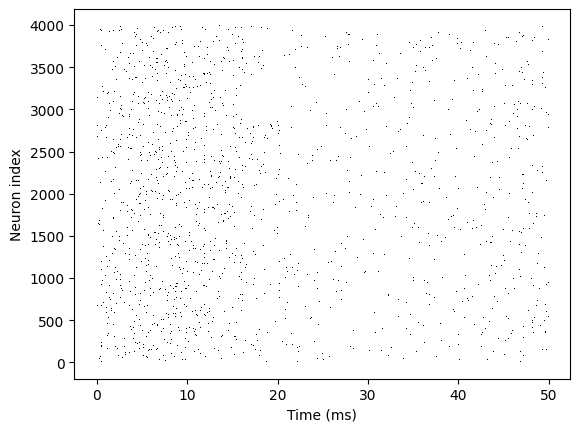

In [9]:
plot(s_mon.t/ms, np.array(s_mon.i), ',k')
xlabel('Time (ms)')
ylabel('Neuron index')
show()